In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
img = cv2.imread('lenna.jpg')
# Image(filename = 'lenna.jpg')

In [3]:
# plt.imshow(img[:,:,::-1]);

In [4]:
img

array([[[ 72, 104, 187],
        [ 72, 104, 187],
        [ 72, 104, 187],
        ...,
        [ 35,  35,  49],
        [ 36,  36,  50],
        [ 38,  39,  53]],

       [[ 76, 107, 192],
        [ 75, 106, 191],
        [ 72, 103, 188],
        ...,
        [ 38,  38,  52],
        [ 39,  39,  53],
        [ 40,  41,  55]],

       [[ 76, 107, 192],
        [ 74, 105, 190],
        [ 72, 103, 188],
        ...,
        [ 37,  37,  51],
        [ 37,  38,  52],
        [ 39,  40,  54]],

       ...,

       [[ 37,  35,  57],
        [ 34,  32,  54],
        [ 32,  31,  51],
        ...,
        [ 31,  31,  49],
        [ 32,  32,  50],
        [ 35,  33,  53]],

       [[ 38,  35,  60],
        [ 34,  32,  54],
        [ 32,  31,  51],
        ...,
        [ 32,  32,  50],
        [ 33,  33,  51],
        [ 36,  34,  54]],

       [[ 39,  36,  61],
        [ 35,  33,  55],
        [ 33,  32,  52],
        ...,
        [ 34,  34,  52],
        [ 35,  35,  53],
        [ 37,  35,  55]]

In [5]:
img.shape

(539, 589, 3)

In [6]:
img.size

952413

In [7]:
img.mean()

93.23651294133953

In [8]:
img.std()

53.1429085078025

# Image Histogram

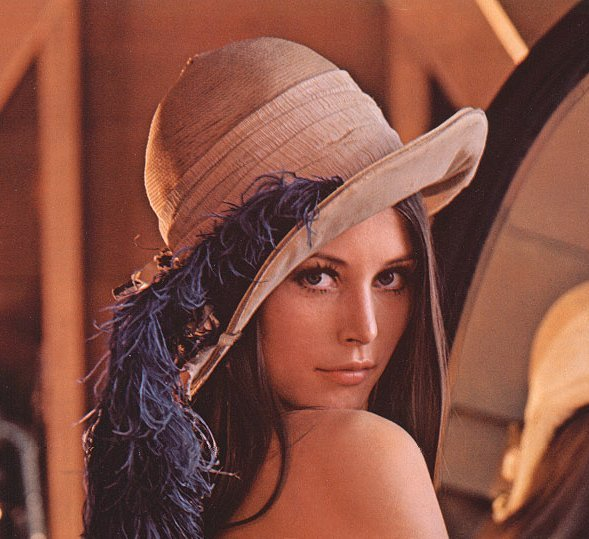

In [9]:
Image(filename='lenna.jpg')

Text(0.5, 1.0, 'Image Histogram')

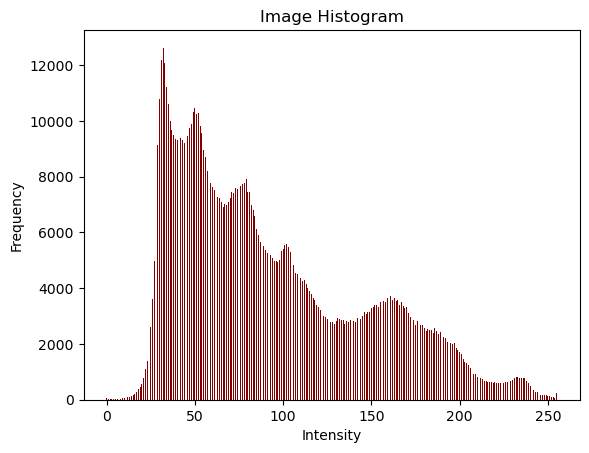

In [10]:
frq = np.zeros((256), dtype=int)
bit = 8
k = 2**bit

for i in range(k):
    frq[i] = np.count_nonzero(img==i)

intensity = np.arange(0,256,1)

plt.bar(intensity, frq, color='maroon', width = 0.5);
plt.xlabel("Intensity");
plt.ylabel("Frequency");
plt.title("Image Histogram")

### Another Implementation

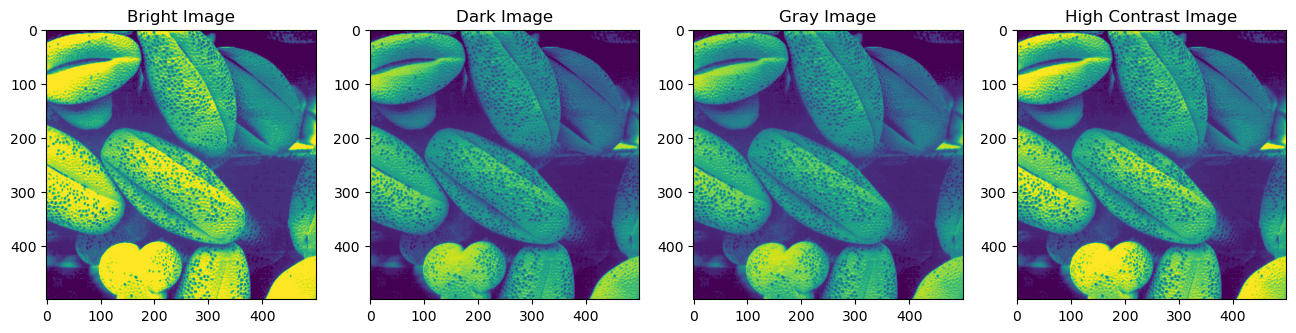

In [11]:
bright = cv2.imread('Images/seedsBright.tif',0)
dark = cv2.imread('Images/seedsDark.tif',0)
gray = cv2.imread('Images/seedsGrayish.tif',0)
high = cv2.imread('Images/seedsHighContrast.tif',0)

plt.figure(figsize=(16,12))
plt.subplot(141); plt.imshow(bright); plt.title('Bright Image');
plt.subplot(142); plt.imshow(dark); plt.title('Dark Image');
plt.subplot(143); plt.imshow(gray); plt.title('Gray Image');
plt.subplot(144); plt.imshow(high); plt.title('High Contrast Image');

In [12]:
def imhist(img):
    hist = np.zeros((256))
    for i in range(256):
        hist[i] = sum(sum(img == i))
    return hist

In [13]:
bhist = imhist(bright)
dhist = imhist(dark)
ghist = imhist(gray)
hhist = imhist(high)

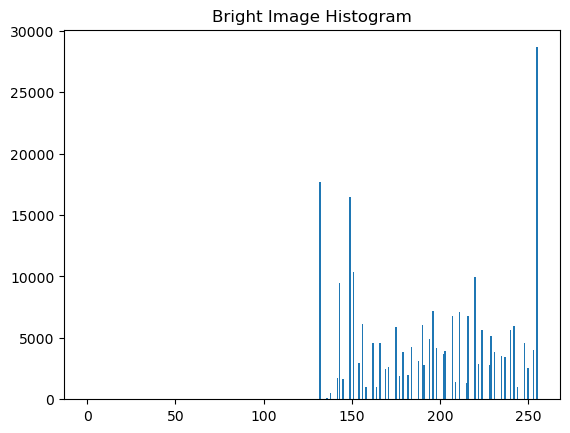

In [14]:
x = np.arange(256)
plt.bar(x, bhist); plt.title('Bright Image Histogram');

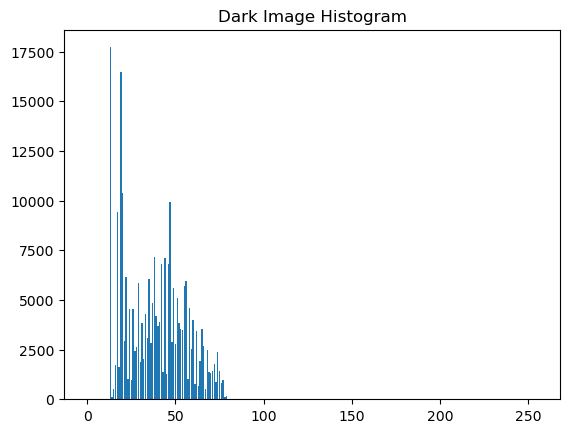

In [15]:
plt.bar(x, dhist); plt.title('Dark Image Histogram');

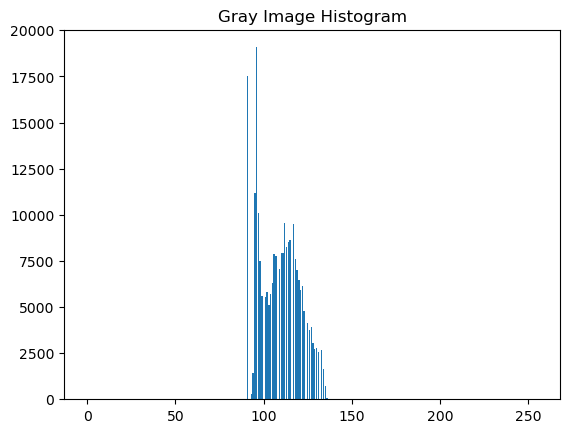

In [16]:
plt.bar(x, ghist); plt.title('Gray Image Histogram');

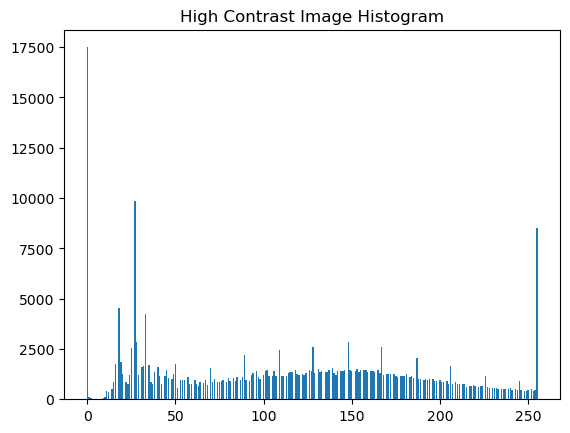

In [17]:
plt.bar(x, hhist); plt.title('High Contrast Image Histogram');

# Another simplified implementation

In [18]:
def histogram(img):
    frequency = [0]*256
    for row in img:
        for pixel in row:
            frequency[pixel] += 1
    
    x = np.arange(256)
    y = frequency
    plt.bar(x,y)

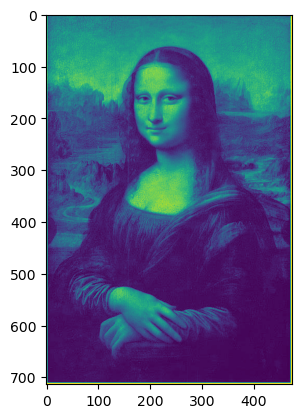

In [19]:
img2 = cv2.imread('monalisa.jpeg',0)
plt.imshow(img2);

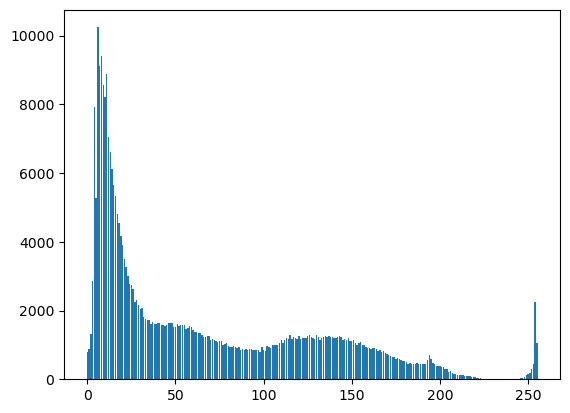

In [20]:
histogram(img2)

<BarContainer object of 256 artists>

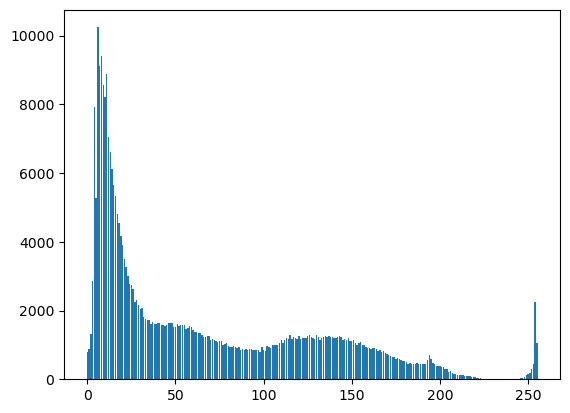

In [30]:
b = np.zeros(256)

for i in range(256):
    b[i] = sum(sum(img2[:] == i))

plt.bar(x,b)

<BarContainer object of 256 artists>

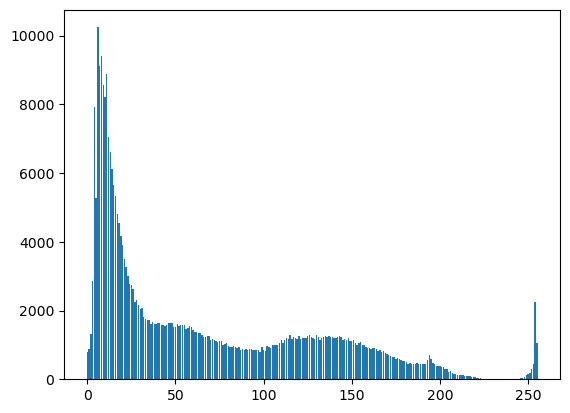

In [31]:
b = np.bincount(img2.ravel(), minlength=256)
plt.bar(x,b)

# Simplest Implementation

In [22]:
def compute_histogram(image):
    # Initialize histogram bins with zeros
    histogram = [0] * 256
    
    # Get the dimensions of the image
    rows, cols = image.shape
    
    # Iterate through each pixel in the image
    for i in range(rows):
        for j in range(cols):
            # Extract intensity of the pixel
            intensity = image[i, j]
            
            # Increment the corresponding histogram bin
            histogram[intensity] += 1
            
    return histogram

# Example usage:
# histogram = compute_histogram(your_image_array)


<BarContainer object of 256 artists>

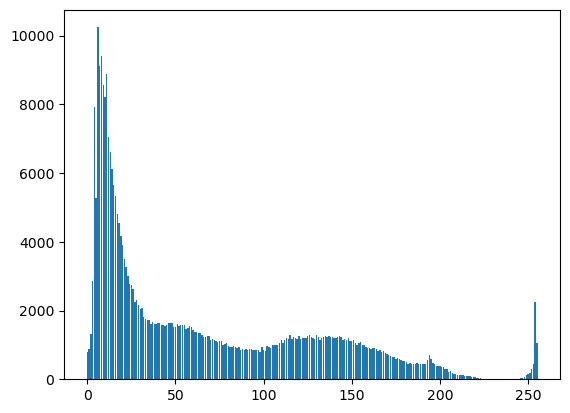

In [23]:
h = compute_histogram(img2)
plt.bar(x,h)

# Similar implementation in MATLAB